In [1]:
# Importieren der benötigten Pakete
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Pfad zum Ordner. Muss individuell angepasst werden
#os.chdir("C:\Users\bondr\OneDrive\ilmu (sync onedrive)\Studium\WS2122\EWIFO\Daten-20211215")

##############################################################################
############### Aufgabe 3.2  #################################################
##############################################################################


In [2]:
data = pd.read_excel("houseprice.xlsx","Sheet1")
data.head()


,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


## A) making the modell

In [30]:
# Abhängige Variable
YVar = data[['price']] #slice menjadi dataframe baru
# YVar_series = data['price'] #slice menjadi series

# Erklärende Variable
XVar = data[['sqrft']]
test = data[["sqrft"]]
# Konstante hinzufügen
print(XVar.columns.tolist())
XVar = pd.DataFrame(sm.add_constant(XVar.values, has_constant='add'),               
   columns = ['constant'] + XVar.columns.tolist())
# print(XVar)

# Koeffizienten der Schätzung anzeigen. \n startet eine neue Zeile
print('Geschätzte Koeffizienten: \n', model_house_price.params)

# Alternativ: den gesamten Schätzoutput anzeigen
print(model_house_price.summary())

['sqrft']
Geschätzte Koeffizienten: 
 constant    11.204145
sqrft        0.140211
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     140.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.42e-20
Time:                        10:31:00   Log-Likelihood:                -489.31
No. Observations:                  88   AIC:                             982.6
Df Residuals:                      86   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Plotting

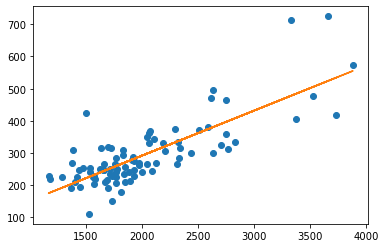

In [23]:
# Plot mit Linearem Modell. Dies ist nur als Zusatz-Information gedacht,
# die Abbildung war nicht Bestandteil des Übungsblattes
plt.plot(XVar['sqrft'], YVar,"o")
plt.plot(XVar['sqrft'], model_house_price.fittedvalues)


## B

In [ ]:

# Man kann sich auch nur den Parameter zu einer bestimmten Variablen anschauen
print('Parameter sqrft:', model_house_price.params['sqrft'])

# Gerundet
print('Parameter sqrft gerundet:', round(model_house_price.params['sqrft'],4))


## C

In [ ]:

# Summe der quadrierten Residueen. Hier können wir auch die Ergebnisse der
# Modellschätzung zurückgreifen.
print('Summe der quadrierten Residueen:', round(model_house_price.ssr,2))

# Für die Stichprobenvarianz können wir nicht auf die Modellergebnisse zurück-
# greifen. Hier nehmen wir die Funktion pd.var(). Wichtig: bei neuen
# Funktionen immer die Dokumentation checken. Hier ist es zum Beispiel
# wichtig darauf zu achten, dass auch wirklich die Stichprobenvarianz
# berechnet wird, d.h. duch n-1 geteilt wird.
print('Stichprobenvarianz:', round(data.var()['price'],2))



## D


In [ ]:
# R2. Auch hier können wir wieder auf die Modellschätzung zurückgreifen.
print('R2: ', round(model_house_price.rsquared,2))


In [36]:
data.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft,price_euro,sqrmtr
0,300.0,349.100006,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,264.00,226.4902
1,370.0,351.500000,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,325.60,192.8604
2,191.0,217.699997,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,168.08,127.6446
3,195.0,231.800003,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,171.60,134.5192
4,373.0,319.100006,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,328.24,233.5506


## F

In [ ]:

# Erstellung der Variablen price_euro und sqrmtr. Wir fügen die neuen
# Variablen direkt unserem Dataframe "data" hinzu.
data['price_euro'] = data['price'] * 0.88
data['sqrmtr'] = data['sqrft'] * 0.0929
data.head()

In [52]:
type(XVar_f)

pandas.core.frame.DataFrame

In [54]:

# Erklärende Variable inklusive Konstante
XVar_f = data[['sqrmtr']]
XVar_f = pd.DataFrame(sm.add_constant(XVar_f.values, has_constant='add'), \
                      columns = ['constant'] + XVar_f.columns.tolist())
XVar_f2 = sm.add_constant(data[["sqrmtr"]]) #lebih elegant
#print(XVar_f)
print(XVar_f2.head())

   const    sqrmtr
0    1.0  226.4902
1    1.0  192.8604
2    1.0  127.6446
3    1.0  134.5192
4    1.0  233.5506


C:\Users\bondr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# Abhängige Variable
YVar_f = data[['price_euro']]

# Modellschätzung
model_house_price_f = sm.OLS(YVar_f, XVar_f).fit()
model_house_price_f2 = sm.OLS(YVar_f, XVar_f2).fit()

# Ausgabe der Parameter
print(model_house_price_f.params)
print(model_house_price_f2.params)

constant    9.859648
sqrmtr      1.328156
dtype: float64
const     9.859648
sqrmtr    1.328156
dtype: float64


## Using the OLS Modell

In [72]:
#kalau mau prediksi harus pakai list, bahkan beberapa data juga pakai list dalam list
model_house_price_f.predict([[100,0],[0,100]]) 

array([985.96476414, 132.81556514])